In [2]:
from keras.models import load_model


In [3]:
model = load_model("top_aug_no_sh.keras")

In [4]:
# model.summary()

In [5]:
class_names = ['battery',
 'biological',
 'brown-glass',
 'cardboard',
 'clothes',
 'green-glass',
 'metal',
 'paper',
 'plastic',
 'shoes',
 'trash',
 'white-glass']

In [6]:
def get_prediction(img):
    plt.imshow(img)
    plt.axis("off")
    
    img = tf.image.resize(img, (299, 299))
    img *= 1./255
    img = np.expand_dims(img, axis=0)
    
    predictions = model.predict(img)
    plt.title(class_names[np.argmax(predictions)])
    s = class_names[np.argmax(predictions)]
    plt.show()
    return s


In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

cap = cv2.VideoCapture(0)

In [ ]:
#Open the camera (0 is typically the default camera)
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    if not ret:
        print("Failed to capture image from camera.")
        break
    
    frame = cv2.resize(frame,(600,400))

#Convert BGR image to RGB
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Display the prediction
#    s = get_prediction(img_rgb)

# Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break




In [8]:
#  close the OpenCV window
cap.release()
cv2.destroyAllWindows()

In [9]:
import serial
import time

In [ ]:
# Initialize serial connection with Arduino Uno
arduino = serial.Serial('COM5', 9600)  # Replace 'COM3' with the appropriate port

In [11]:
def classify(command):
    # Convert prediction to bytes
#     prediction_bytes = str(most_common_prediction).encode('utf-8')
    
    # Send prediction to Arduino Uno
    arduino.write(command.encode())
    
    # Wait for a short time to ensure the message is sent
    time.sleep(1)

    

In [ ]:
classify('0')

In [ ]:
# def classify(waste_type):
#     # Send waste type to Arduino Uno
#     arduino.write(waste_type.to_bytes(1, 'little'))
    
#     # Wait for a short time to ensure the message is sent
#     time.sleep(0.1)


In [11]:
from collections import Counter

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


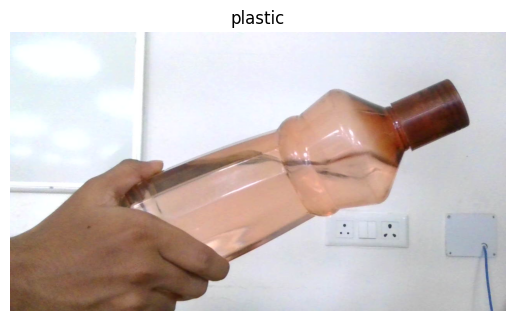

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


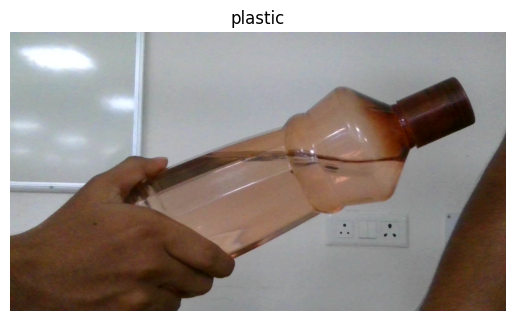

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


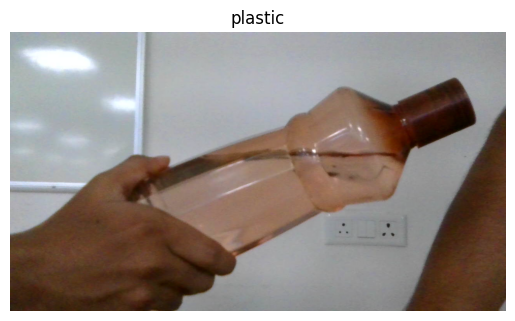

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


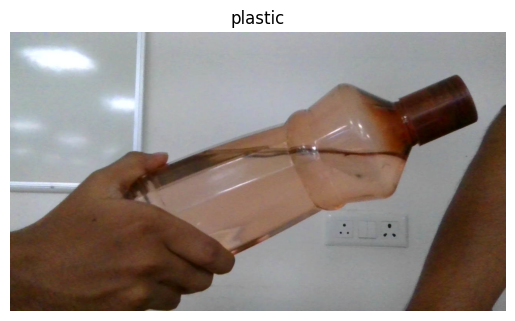

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


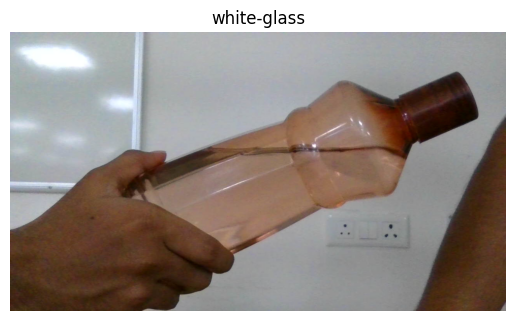

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


KeyboardInterrupt: 

In [20]:
# Open the camera (0 is typically the default camera)
cap = cv2.VideoCapture(1)

# Initialize variables
predictions = []

while True:
    ret, frame = cap.read()

    if not ret:
        print("Failed to capture image from camera.")
        break

    # Convert BGR image to RGB
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get prediction
    prediction = get_prediction(img_rgb)
    
    # Append prediction to list
    predictions.append(prediction)

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    # Check if we have 10 predictions
    if len(predictions) == 10:
        # Find the most common prediction
        most_common_prediction = Counter(predictions).most_common(1)[0][0]
        
        # Call classify function with most common prediction
        if most_common_prediction ==  "plastic":
            classify('1')
        
        if most_common_prediction ==  "brown-glass" or most_common_prediction ==  "green-glass" or most_common_prediction ==  "white-glass":
            classify('0')
        
        # Reset predictions list
        predictions = []




In [30]:
# Release the camera
cap.release()
cv2.destroyAllWindows()